<a href="https://colab.research.google.com/github/rlba96/Energy-Expenditure/blob/master/Energy_Expenditure_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "/content/drive/My Drive/ModelSimulations/data/Dataset_Run.csv"

df = pd.read_csv(path, index_col=False)

In [ ]:
df.head()

In [ ]:
df['HeartRate'].value_counts(dropna=False,ascending=True)

In [ ]:
import json as simplejson

simplejson.loads(df['HeartRate'].value_counts().to_json())

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "/content/drive/My Drive/ModelSimulations/Aquisition_1/Subj001/Humon_Data.csv"

df = pd.read_csv(path, index_col=False)

In [ ]:
df.head()

In [ ]:
#================================================================================#
#                      Muscle Oxygenation Data Processing                        #
#================================================================================#

In [ ]:
!pip install js2py

In [ ]:
def hexStrToInt(hexstr):
    val = (int(hexstr[0:2],16))
    return val

In [ ]:
import js2py

js_func = js2py.eval_js('function(r){var e = r[3]<<24 | r[2]<<16 | r[1]<<8 | r[0], n = new ArrayBuffer(4); return new Int32Array(n)[0] = e, new Float32Array(n)[0]}')

#humon_data = bytes([0x3f, 0x3c, 0x2b, 0x3f])
humon_data = bytes([0xb7, 0x3c, 0x28, 0x3f])

humon_data_converted = round(js_func(humon_data)*100,2)

print(humon_data_converted)

65.72


In [ ]:
# SmO2 data
import csv

path = "/content/drive/My Drive/ModelSimulations/Aquisition_1/Subj013/Humon_Data.csv"
path_w = "/content/drive/My Drive/ModelSimulations/Aquisition_1/Subj013/Muscle_Oxy_Data.csv"

with open(path,'r') as f, open(path_w,'w') as fw,  open(path_w2,'w') as fw2:
  reader = csv.reader(f)
  for row in reader:
    value = str(row[:1])
    tstamp = value[2:12]
    b1 = hexStrToInt(value[37:39])
    b2 = hexStrToInt(value[40:42])
    b3 = hexStrToInt(value[43:45])
    b4 = hexStrToInt(value[46:48])
    arrayHumon = bytes([b1, b2, b3, b4])
    humon_data_converted = round(js_func(arrayHumon)*100,2)
    fw.write(tstamp)
    fw.write(",")
    fw.write(str(humon_data_converted))
    fw.write("\n")

print(value)
print(value[2:12])
print(value[37:48])   # conj 4 bytes sm02
print(value[37:39])   # byte 1
print(value[40:42])   # byte 2
print(value[43:45])   # byte 3
print(value[46:48])   # byte 4

b1 = hexStrToInt(value[37:39])
b2 = hexStrToInt(value[40:42])
b3 = hexStrToInt(value[43:45])
b4 = hexStrToInt(value[46:48])

arrayHumon = bytes([b1, b2, b3, b4])
humon_data = bytes([0xb7, 0x3c, 0x28, 0x3f])

print(arrayHumon)
print(humon_data)
print(str(humon_data_converted))

f.close()
fw.close()

In [ ]:
import csv
import struct

path_raw = "/content/drive/My Drive/ModelSimulations/Aquisition_1/Subj013/Humon_Data.csv" 
path_smo2 = "/content/drive/My Drive/ModelSimulations/Aquisition_1/Subj013/Muscle_Oxygenation_Data.csv"

with open(path_raw,'r') as f_r, open(path_smo2,'w') as f_w:
  reader = csv.reader(f_r)

  for row in reader:
    value = str(row[:1])
    tstamp = value[2:12]
    val = value[46:48] + value[43:45] + value[40:42] + value[37:39]
    smo2 = round(struct.unpack('!f', bytes.fromhex(val))[0]*100,2)
    f_w.write(tstamp)
    f_w.write(",")
    f_w.write(str(smo2))
    f_w.write("\n")

  f_r.close()
  f_w.close()

print(smo2)

29.52


In [ ]:
# 1st byte array
import csv

path = "/content/drive/My Drive/ModelSimulations/Aquisition_1/Subj018/Humon_Data.csv"
path_w = "/content/drive/My Drive/ModelSimulations/Aquisition_1/Subj018/byteArray1.csv"

with open(path,'r') as f, open(path_w,'w') as fw:
  reader = csv.reader(f)
  for row in reader:
    value = str(row[:1])
    tstamp = value[2:12]

    b1 = hexStrToInt(value[13:15])
    b2 = hexStrToInt(value[16:18])
    b3 = hexStrToInt(value[19:21])
    b4 = hexStrToInt(value[22:24])

    arrayHumon = bytes([b1, b2, b3, b4])
    humon_data_converted = round(js_func(arrayHumon)*100,2)

    fw.write(tstamp)
    fw.write(",")
    fw.write(str(humon_data_converted))
    fw.write("\n")

print(value)
#print(value[2:12])
print(value[13:24])   # conj 4 bytes sm02
print(value[13:15])   # byte 1
print(value[16:18])   # byte 2
print(value[19:21])   # byte 3
print(value[22:24])   # byte 4

f.close()
fw.close()

['1596018919 b3 ef f6 40 70 5b 06 41 4c 74 05 3f 00 00 00 40 ']
b3 ef f6 40
b3
ef
f6
40


In [ ]:
# 2nd byte array
import csv

path = "/content/drive/My Drive/ModelSimulations/Aquisition_1/Subj018/Humon_Data.csv"
path_w = "/content/drive/My Drive/ModelSimulations/Aquisition_1/Subj018/byteArray2.csv"

with open(path,'r') as f, open(path_w,'w') as fw:
  reader = csv.reader(f)
  for row in reader:
    value = str(row[:1])
    tstamp = value[2:12]

    b1 = hexStrToInt(value[25:27])
    b2 = hexStrToInt(value[28:30])
    b3 = hexStrToInt(value[31:33])
    b4 = hexStrToInt(value[34:36])

    arrayHumon = bytes([b1, b2, b3, b4])
    humon_data_converted = round(js_func(arrayHumon)*100,2)

    fw.write(tstamp)
    fw.write(",")
    fw.write(str(humon_data_converted))
    fw.write("\n")

print(value)
#print(value[2:12])
print(value[25:36])   # conj 4 bytes sm02
print(value[25:27])   # byte 1
print(value[28:30])   # byte 2
print(value[31:33])   # byte 3
print(value[34:36])   # byte 4

f.close()
fw.close()

['1596018919 b3 ef f6 40 70 5b 06 41 4c 74 05 3f 00 00 00 40 ']
70 5b 06 41
70
5b
06
41


In [ ]:
# 4th byte array
import csv

path = "/content/drive/My Drive/ModelSimulations/Aquisition_1/Subj018/Humon_Data.csv"
path_w = "/content/drive/My Drive/ModelSimulations/Aquisition_1/Subj018/byteArray4.csv"

with open(path,'r') as f, open(path_w,'w') as fw:
  reader = csv.reader(f)
  for row in reader:
    value = str(row[:1])
    tstamp = value[2:12]

    b1 = hexStrToInt(value[49:51])
    b2 = hexStrToInt(value[52:54])
    b3 = hexStrToInt(value[55:57])
    b4 = hexStrToInt(value[58:60])

    arrayHumon = bytes([b1, b2, b3, b4])
    humon_data_converted = round(js_func(arrayHumon)*100,2)

    fw.write(tstamp)
    fw.write(",")
    fw.write(str(humon_data_converted))
    fw.write("\n")

print(value)
#print(value[2:12])
print(value[49:60])   # conj 4 bytes sm02
print(value[49:51])   # byte 1
print(value[52:54])   # byte 2
print(value[55:57])   # byte 3
print(value[58:60])   # byte 4

f.close()
fw.close()

['1596018919 b3 ef f6 40 70 5b 06 41 4c 74 05 3f 00 00 00 40 ']
00 00 00 40
00
00
00
40


In [ ]:
#================================================================================#
#                           EDA Data Processing                                  #
#================================================================================#

In [ ]:
import pandas as pd
import numpy as np

path = "/content/drive/My Drive/ModelSimulations/Aquisition_1/Subj020/EDA_Data.csv"

df = pd.read_csv(path, index_col=False)

df = df.replace([np.inf, -np.inf], np.nan)  # replace inf to nan values

df.columns[df.isna().any()].tolist()  # check columns with NaN values

df = df.fillna(df.mean()) # replace nan values to mean column value

df.to_csv(path)

In [ ]:
#================================================================================#
#                       Participants Characteristics                             #
#================================================================================#

In [ ]:
# All
import statistics as sta

age = [21,16,24,17,24,16,22,23,16,18,37,15,16,18,18,25,24,29,23,23]
weight = [60.3,75,77.3,68,92,64.2,70.7,86.5,65,80.4,82.8,69.8,61.2,75.6,54.3,75.3,58.2,49.4,65,79]
height = [175,174,188,175,176,173,170,174,174,181,175,171,164,184,163,175,172,160,176,182]

print(sta.mean(age)," +- ",sta.stdev(age))
print(sta.mean(weight)," +- ",sta.stdev(weight))
print(sta.mean(height)," +- ",sta.stdev(height))

21.25  +-  5.398586559656635
70.5  +-  11.03053179039648
174.1  +-  6.758230849159143


In [ ]:
# Athletes
import statistics as sta

age_a = [21,16,17,16,22,16,18,15,16,18,18,24,23]
weight_a = [60.3,75,68,64.2,70.7,65,80.4,69.8,61.2,75.6,54.3,58.2,79]
height_a = [175,174,175,173,170,174,181,171,164,184,163,172,182]

print(len(age_a))
print(len(weight_a))
print(len(height_a))
print(sta.mean(age_a)," +- ",sta.stdev(age_a))
print(sta.mean(weight_a)," +- ",sta.stdev(weight_a))
print(sta.mean(height_a)," +- ",sta.stdev(height_a))

In [ ]:
# Non-athletes
import statistics as sta

age_na = [24,24,23,37,25,24,29]
weight_na = [77.3,92,86.5,82.8,75.3,49.4,65]
height_na = [188,176,174,175,175,160,176]

print(len(age_na))
print(len(weight_na))
print(len(height_na))
print(sta.mean(age_na)," +- ",sta.stdev(age_na))
print(sta.mean(weight_na)," +- ",sta.stdev(weight_na))
print(sta.mean(height_na)," +- ",sta.stdev(height_na))

7
7
7
26.571428571428573  +-  4.995235825502231
75.47142857142858  +-  14.38329056993036
174.85714285714286  +-  8.132825901423018


In [ ]:
#================================================================================#
#                           Humon Data Val                                       #
#================================================================================#

In [ ]:
# SmO2 data
import csv

path = "/content/drive/My Drive/ModelSimulations/Val_Humon/JD/Meu_SW/Humon_Data.csv"
path_w = "/content/drive/My Drive/ModelSimulations/Val_Humon/JD/Meu_SW/Muscle_Oxy_Data.csv"

with open(path,'r') as f, open(path_w,'w') as fw:
  reader = csv.reader(f)
  for row in reader:
    value = str(row[:1])
    tstamp = value[2:12]
    b1 = hexStrToInt(value[37:39])
    b2 = hexStrToInt(value[40:42])
    b3 = hexStrToInt(value[43:45])
    b4 = hexStrToInt(value[46:48])
    arrayHumon = bytes([b1, b2, b3, b4])
    humon_data_converted = round(js_func(arrayHumon)*100,2)
    fw.write(tstamp)
    fw.write(",")
    fw.write(str(humon_data_converted))
    fw.write("\n")

print(value)
print(value[2:12])
print(value[37:48])   # conj 4 bytes sm02
print(value[37:39])   # byte 1
print(value[40:42])   # byte 2
print(value[43:45])   # byte 3
print(value[46:48])   # byte 4

b1 = hexStrToInt(value[37:39])
b2 = hexStrToInt(value[40:42])
b3 = hexStrToInt(value[43:45])
b4 = hexStrToInt(value[46:48])

arrayHumon = bytes([b1, b2, b3, b4])
humon_data = bytes([0xb7, 0x3c, 0x28, 0x3f])

print(arrayHumon)
print(humon_data)
print(str(humon_data_converted))

f.close()
fw.close()

In [ ]:
# 4th byte array
import csv

path = "/content/drive/My Drive/ModelSimulations/Val_Humon/JD/Meu_SW/Humon_Data.csv"
path_w = "/content/drive/My Drive/ModelSimulations/Val_Humon/JD/Meu_SW/byte_array_4.csv"

with open(path,'r') as f, open(path_w,'w') as fw:
  reader = csv.reader(f)
  for row in reader:
    value = str(row[:1])
    tstamp = value[2:12]

    b1 = hexStrToInt(value[49:51])
    b2 = hexStrToInt(value[52:54])
    b3 = hexStrToInt(value[55:57])
    b4 = hexStrToInt(value[58:60])

    arrayHumon = bytes([b1, b2, b3, b4])
    humon_data_converted = round(js_func(arrayHumon)*100,2)

    fw.write(tstamp)
    fw.write(",")
    fw.write(str(humon_data_converted))
    fw.write("\n")

print(value)
#print(value[2:12])
print(value[49:60])   # conj 4 bytes sm02
print(value[49:51])   # byte 1
print(value[52:54])   # byte 2
print(value[55:57])   # byte 3
print(value[58:60])   # byte 4

f.close()
fw.close()

In [ ]:
#================================================================================#
#                           Model Training                                       #
#================================================================================#

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "/content/drive/My Drive/ModelSimulations/Val_Humon/Dataset.csv"

df = pd.read_csv(path, index_col=False)

In [ ]:
df  = df.reindex(np.random.permutation(df.index))   # randomize the data

In [ ]:
df.columns[df.isna().any()].tolist()  # check columns with NaN values

**Energy expenditure calculation by the Keytel equation**

a: age;

g: gender;

h: height;

hr: heart rate;

w: weight;

*EE (kJ/min) = g * (-59.3954 + 0.6309 x hr + 0.1988 * w + 0.2017 * a) + (1-g) * (-20.4022 * hr - 0.1263 * w + 0.074 * a)*

To convert to kcal/min, divide by 4.184

In [ ]:
df.head(5)

,age,weight,height,bmi,heart_rate,smo2,eda,m_pelvis,m_lower_back,m_lower_torax_back,m_medium_back,m_upper_back,m_neck,m_head,m_right_shoulder,m_right_upper_arm,m_right_forearm,m_right_hand,m_left_shoulder,m_left_upper_arm,m_left_forearm,m_left_hand,m_right_upper_leg,m_right_lower_leg,m_right_foot,m_right_toe,m_left_upper_leg,m_left_lower_leg,m_left_foot,m_left_toe,gender
10332,25,75.3,1.70,67.718167,109.000000,68.060136,0.002255,2.651568,2.292174,2.163818,2.114419,2.176463,2.114728,2.625745,2.112166,3.073031,3.199484,4.017121,2.132605,3.166806,3.962796,4.313058,11.888564,7.441699,10.366547,10.366547,10.802822,8.989256,10.607283,10.607283,1
4850,16,64.2,1.73,57.534164,131.072644,61.400651,0.001616,9.620772,9.249431,9.482626,10.217406,11.092799,9.452689,10.243951,9.218966,12.414977,14.974216,16.111907,8.803410,11.699032,20.283436,21.210907,19.966117,20.803396,23.279535,23.279535,21.038800,21.474181,23.196651,23.196651,1
717,16,75.0,1.74,67.135374,134.000000,74.872621,0.000980,11.267062,9.857020,9.345501,9.143684,9.371913,8.602804,9.432415,9.794023,11.197651,14.626808,15.042640,9.162526,11.366049,14.694747,12.597011,16.892125,19.804313,19.481012,19.481012,21.988133,20.092291,18.221722,18.221722,1
8986,16,61.2,1.64,55.434821,152.000000,9.556758,0.001521,9.081422,8.640695,8.798869,9.489097,10.364579,8.601532,7.538131,7.324369,8.954047,13.322591,12.913257,7.652401,8.878610,11.470051,11.507688,17.075222,15.377717,18.143172,18.143172,13.697067,13.386456,16.975710,16.975710,0
5574,22,70.7,1.70,63.581333,171.000000,72.362048,0.000980,13.383261,11.799175,11.426916,11.687938,12.499875,11.090649,11.643032,10.613752,14.090008,21.569368,25.156567,10.257115,13.615195,23.126510,20.465360,22.141489,22.039493,28.130228,28.130228,18.471124,23.119925,23.740827,23.740827,1


In [ ]:
df.describe()

,age,weight,height,bmi,heart_rate,smo2,eda,m_pelvis,m_lower_back,m_lower_torax_back,m_medium_back,m_upper_back,m_neck,m_head,m_right_shoulder,m_right_upper_arm,m_right_forearm,m_right_hand,m_left_shoulder,m_left_upper_arm,m_left_forearm,m_left_hand,m_right_upper_leg,m_right_lower_leg,m_right_foot,m_right_toe,m_left_upper_leg,m_left_lower_leg,m_left_foot,m_left_toe,gender
count,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000,12491.000000
mean,20.854535,69.160163,1.726978,61.965943,158.215131,60.831567,0.002255,11.239686,10.155956,9.897096,10.018782,10.511320,9.606387,10.169895,9.463330,11.733839,14.702081,14.841031,9.222278,11.017534,14.470495,13.367256,20.731906,21.150564,22.624824,22.624824,20.962387,22.170893,21.602636,21.602636,0.827075
std,4.938085,11.197375,0.062838,9.785452,14.923703,18.464998,0.007099,1.765226,1.448664,1.444287,1.615850,1.849257,1.508297,1.758257,1.433748,2.019263,2.916863,3.558739,1.327361,1.719600,3.060162,3.153564,3.707021,3.850100,4.078431,4.078431,4.157265,4.225079,3.380641,3.380641,0.378197
min,15.000000,49.400000,1.600000,44.967936,86.000000,0.417011,-0.010355,0.334588,0.442739,0.617890,0.874552,1.084145,0.753716,0.632884,0.387132,0.759414,0.783185,0.194526,0.390416,0.572697,0.723029,0.252600,0.818912,2.100112,0.938347,0.938347,0.703097,0.603669,-0.532492,-0.532492,0.000000
25%,16.000000,60.300000,1.700000,53.915012,148.140979,55.076140,0.000980,10.408178,9.570563,9.323573,9.276017,9.564274,8.893757,9.229931,8.780890,10.759902,13.318387,12.858482,8.642741,10.235253,12.876612,11.510264,18.175742,18.740960,19.952637,19.952637,18.214122,19.532442,19.447381,19.447381,1.000000
50%,21.000000,68.000000,1.740000,60.799681,159.000000,69.838337,0.001039,11.308718,10.328371,10.043396,10.102378,10.524207,9.732711,10.104857,9.630150,11.796701,14.850148,14.879078,9.347511,11.076578,14.354652,13.176461,20.577934,20.799213,22.255933,22.255933,20.922990,22.418268,21.838139,21.838139,1.000000
75%,24.000000,77.300000,1.750000,68.131496,170.000000,72.418903,0.001638,12.242432,10.963605,10.804601,11.041447,11.595201,10.577421,11.400698,10.362056,12.799150,16.434452,17.205481,10.036402,11.953208,15.993451,15.239550,23.221569,23.311183,24.972940,24.972940,23.628593,24.702939,23.977115,23.977115,1.000000
max,37.000000,92.000000,1.880000,82.164704,188.000000,79.740410,0.207347,15.931777,14.148080,17.893953,23.097576,27.598002,19.588415,15.755112,15.139149,23.571361,33.076310,28.148348,12.547007,18.818265,32.605916,25.062762,45.692925,45.783172,48.902520,48.902520,48.140269,43.258290,46.906082,46.906082,1.000000


In [ ]:
df[df['EE_Keytel'] < 0]['EE_Keytel']

In [ ]:
# Energy expenditure (kcal/min) based on Keytel
heart_rate = df.iloc[:, [4]].values.round(0)
weight = df.iloc[:, [1]].values
gender = df.iloc[:, [30]].values
age = df.iloc[:, [0]].values

EE_Keytel = (gender*(-59.3954 + 0.6309*heart_rate + 0.1988*weight + 0.2017*age) + (1-gender)*(-20.4022 + 0.4472*heart_rate - 0.1263*weight + 0.074*age))/4.184                         # energy expenditure in kcal/min

In [ ]:
EE_Keytel < 0

In [ ]:
df.iloc[:, [0]]

In [ ]:
#======================== Physiological signals ===============================#

In [ ]:
# Features and labels
X_data1 = df.iloc[:, [4,5,6]]    # features
Y_data1 = pd.DataFrame({'EE': EE_Keytel[:, 0]})                          # label

In [ ]:
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#K-Fold cross validation
kf = KFold(n_splits=5)
kf.get_n_splits(X_data1)
All_coef = []
All_intercept = []
count_model = 1

for train_index1, test_index1 in kf.split(X_data1):
     print("Model ", count_model)
     X_train1, X_test1 = X_data1.iloc[train_index1], X_data1.iloc[test_index1]
     Y_train1, Y_test1 = Y_data1.iloc[train_index1], Y_data1.iloc[test_index1]
    
     model = LinearRegression()
     model.fit(X=X_train1, y=Y_train1)
     Y_pred1 = model.predict(X_test1)

     coef = All_coef.append(model.coef_)
     print("Regression coeficients")
     print(model.coef_)

     inter = All_intercept.append(model.intercept_)
     print("b")
     print(model.intercept_)

     mean_real_EE = Y_test1.mean()
     std_real_EE = Y_test1.std()
     print("Real EE")
     print(mean_real_EE," +- ",std_real_EE) 

     mean_EE = Y_pred1.mean()
     std_EE = Y_pred1.std()
     print("Mean predicted EE")
     print(round(mean_EE,4), "+-", round(std_EE,4))

     mse = mean_squared_error(Y_test1, Y_pred1)
     print("MSE")
     print(mse)

     rmse = sqrt(mse)
     print("RMSE")
     print(rmse)

     mae = mean_absolute_error(Y_test1, Y_pred1)
     print("MAE")
     print(mae)

     r2 = model.score(X_train1,Y_train1)
     print("R^2")
     print(r2)

     np.savetxt("Physio"+str(count_model)+".csv", Y_pred1, delimiter=",")

     count_model += 1
     print("\n")

Model  1
Regression coeficients
[[  0.15246571   0.05207152 -11.53387473]]
b
[-13.76664979]
Real EE
EE    13.498168
dtype: float64  +-  EE    2.524366
dtype: float64
Mean predicted EE
13.4932 +- 2.2911
MSE
1.132731435105479
RMSE
1.0642985648329508
MAE
0.7382320202909933
R^2
0.8184501985318469


Model  2
Regression coeficients
[[  0.15251157   0.05247396 -11.38842658]]
b
[-13.80393257]
Real EE
EE    13.573571
dtype: float64  +-  EE    2.528982
dtype: float64
Mean predicted EE
13.5425 +- 2.3039
MSE
1.145808521496901
RMSE
1.070424458566274
MAE
0.7385114433814655
R^2
0.8187316458599561


Model  3
Regression coeficients
[[  0.15236066   0.05155412 -15.74736687]]
b
[-13.70425324]
Real EE
EE    13.441622
dtype: float64  +-  EE    2.485792
dtype: float64
Mean predicted EE
13.4606 +- 2.2692
MSE
1.1001193121511745
RMSE
1.0488657264641525
MAE
0.7287290645319415
R^2
0.8183550542767823


Model  4
Regression coeficients
[[  0.15259086   0.05221169 -11.19297525]]
b
[-13.7943882]
Real EE
EE    13.4085

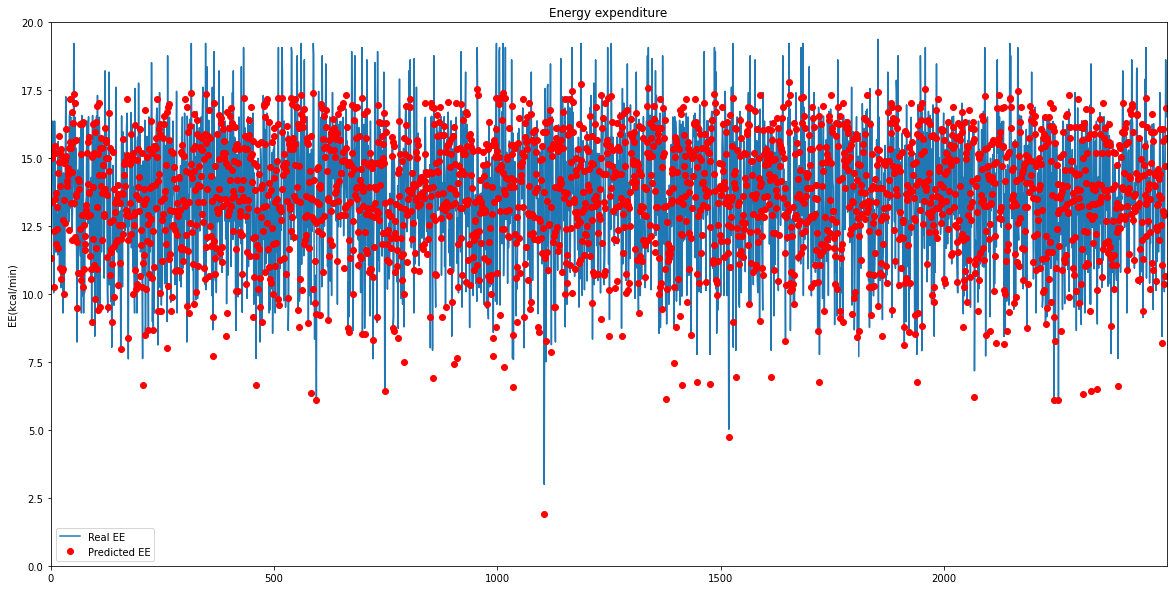

In [ ]:
from google.colab import files

# Plot tested vs predicted Energy Expenditure
x = [x for x in range(len(Y_test1))]

# Guard variables for later comparision with Weir equation
EE_pred = pd.read_csv('Physio2.csv',sep=',',engine='python',header=0)

test = plt.figure()
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(x,Y_test1,label = 'Real EE')
plt.plot(x,Y_pred1,'ro',label = 'Predicted EE')
#plt.plot(x,EE_pred,'go',label = 'Predicted EE')
plt.axis([0, len(x), 0, 20])
plt.legend()
plt.ylabel('EE(kcal/min)')
plt.title('Energy expenditure')
test.show()
#test.savefig('real_vs_pred_phy.png')
#files.download('real_vs_pred_phy.png')

In [ ]:
#======================== Accelerometry signals ===============================#

In [ ]:
# Features and labels
X_data1 = df.iloc[:, [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]    # features
Y_data1 = pd.DataFrame({'EE': EE_Keytel[:, 0]})                          # label

In [ ]:
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#K-Fold cross validation
kf = KFold(n_splits=5)
kf.get_n_splits(X_data1)
All_coef = []
All_intercept = []
count_model = 1

for train_index1, test_index1 in kf.split(X_data1):
     print("Model ", count_model)
     X_train1, X_test1 = X_data1.iloc[train_index1], X_data1.iloc[test_index1]
     Y_train1, Y_test1 = Y_data1.iloc[train_index1], Y_data1.iloc[test_index1]
    
     model = LinearRegression()
     model.fit(X=X_train1, y=Y_train1)
     Y_pred1 = model.predict(X_test1)

     coef = All_coef.append(model.coef_)
     print("Regression coeficients")
     print(model.coef_)

     inter = All_intercept.append(model.intercept_)
     print("b")
     print(model.intercept_)

     mean_EE = Y_pred1.mean()
     std_EE = Y_pred1.std()
     print("Mean predicted EE")
     print(round(mean_EE,4), "+-", round(std_EE,4))

     mse = mean_squared_error(Y_test1, Y_pred1)
     print("MSE")
     print(mse)

     rmse = sqrt(mse)
     print("RMSE")
     print(rmse)

     mae = mean_absolute_error(Y_test1, Y_pred1)
     print("MAE")
     print(mae)

     r2 = model.score(X_train1,Y_train1)
     print("R^2")
     print(r2)

     np.savetxt("Acc"+str(count_model)+".csv", Y_pred1, delimiter=",")

     count_model += 1
     print("\n")

Model  1
Regression coeficients
[[ 1.88719321e+00 -4.38167617e+00  8.64526310e+00 -9.73107233e+00
   3.85574504e+00  1.17381905e+00 -7.97541778e-02  2.26060468e-01
  -4.12660873e-01 -6.73533205e-02  7.27011560e-02 -8.25131478e-01
  -2.93476235e-02 -1.94630986e-01  2.34505613e-01 -6.94742544e-02
   4.07355772e-03  9.03449701e-02  9.03449701e-02  6.14744475e-02
   8.22903812e-02 -2.86374933e-04 -2.86374933e-04]]
b
[2.11213967]
Mean predicted EE
13.4713 +- 2.1299
MSE
2.1659592498813063
RMSE
1.4717198272365928
MAE
1.1003741149838833
R^2
0.6741494940208139


Model  2
Regression coeficients
[[ 1.82779238e+00 -4.17960697e+00  8.44579600e+00 -9.69917787e+00
   3.88880251e+00  1.13236866e+00 -7.40194029e-02  1.71780733e-01
  -3.99350429e-01 -5.64148517e-02  7.14072552e-02 -7.99878787e-01
  -2.11493024e-02 -1.95725852e-01  2.33402409e-01 -7.92996830e-02
   1.67034916e-02  9.12801333e-02  9.12801333e-02  6.30539149e-02
   8.04012219e-02 -1.57007440e-03 -1.57007440e-03]]
b
[2.25465376]
Mean predic

In [ ]:
# Predicted mean EE
print((13.4865 + 13.5825 + 13.4345 + 13.4734 + 13.5166)/5)

print("+-")

# Std
print((2.0651+2.1063+2.0115+2.0554+2.0907)/5)

13.4987
+-
2.0658000000000003


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

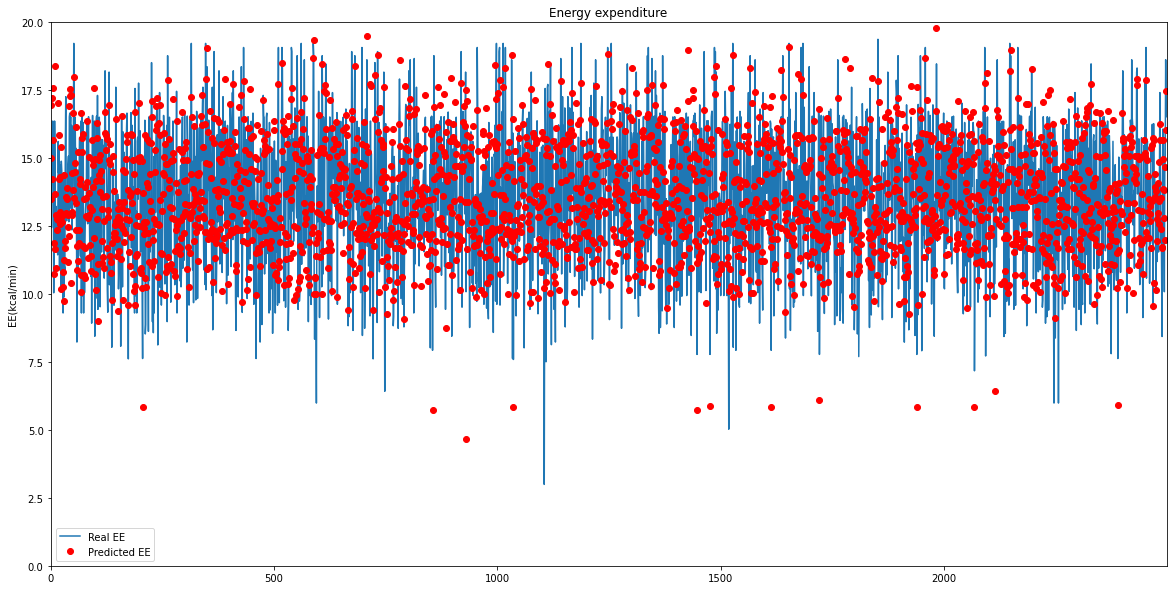

In [ ]:
from google.colab import files

# Plot tested vs predicted Energy Expenditure
x = [x for x in range(len(Y_test1))]

# Guard variables for later comparision with Weir equation
EE_pred = pd.read_csv('Acc2.csv',sep=',',engine='python',header=0)

test = plt.figure()
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(x,Y_test1,label = 'Real EE')
plt.plot(x,Y_pred1,'ro',label = 'Predicted EE')
#plt.plot(x,EE_pred,'go',label = 'Predicted EE')
plt.axis([0, len(x), 0, 20])
plt.legend()
plt.ylabel('EE(kcal/min)')
plt.title('Energy expenditure')
test.show()
test.savefig('real_vs_pred_acc.png')
files.download('real_vs_pred_acc.png')

In [ ]:
#======================== Combined ===============================#

In [ ]:
# Features and labels
X_data1 = df.iloc[:, [4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]    # features
Y_data1 = pd.DataFrame({'EE': EE_Keytel[:, 0]})                          # label

In [ ]:
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#K-Fold cross validation
kf = KFold(n_splits=5)
kf.get_n_splits(X_data1)
All_coef = []
All_intercept = []
count_model = 1

for train_index1, test_index1 in kf.split(X_data1):
     print("Model ", count_model)
     X_train1, X_test1 = X_data1.iloc[train_index1], X_data1.iloc[test_index1]
     Y_train1, Y_test1 = Y_data1.iloc[train_index1], Y_data1.iloc[test_index1]
    
     model = LinearRegression()
     model.fit(X=X_train1, y=Y_train1)
     Y_pred1 = model.predict(X_test1)

     coef = All_coef.append(model.coef_)
     print("Regression coeficients")
     print(model.coef_)

     inter = All_intercept.append(model.intercept_)
     print("b")
     print(model.intercept_)
     
     mean_EE = Y_pred1.mean()
     std_EE = Y_pred1.std()
     print("Mean predicted EE")
     print(round(mean_EE,4), "+-", round(std_EE,4))

     mse = mean_squared_error(Y_test1, Y_pred1)
     print("MSE")
     print(mse)

     rmse = sqrt(mse)
     print("RMSE")
     print(rmse)

     mae = mean_absolute_error(Y_test1, Y_pred1)
     print("MAE")
     print(mae)

     r2 = model.score(X_train1,Y_train1)
     print("R^2")
     print(r2)

     np.savetxt("Combined"+str(count_model)+".csv", Y_pred1, delimiter=",")

     count_model += 1
     print("\n")

Model  1
Regression coeficients
[[ 1.42585657e-01  3.38125455e-02 -7.77485246e+00  1.88752331e+00
  -5.71370808e+00  6.28092137e+00 -4.14774838e+00  1.04793180e+00
   3.87340913e-01  6.32315455e-02 -2.06369595e-01 -1.07660599e-01
  -6.55248945e-02  6.52874995e-02  4.77540582e-01  8.39628068e-02
  -7.48517209e-02  6.85940191e-02 -3.40716536e-02 -1.98049653e-02
  -1.80598109e-03 -1.80598109e-03  4.10650525e-02  7.91868800e-02
  -4.45514527e-02 -4.45514527e-02]]
b
[-11.71138076]
Mean predicted EE
13.4949 +- 2.4488
MSE
0.4089416243799197
RMSE
0.6394854371914341
MAE
0.47826537420507925
R^2
0.9353175455320132


Model  2
Regression coeficients
[[ 1.42684742e-01  3.40742843e-02 -7.68177868e+00  1.92104225e+00
  -5.88255674e+00  6.49668383e+00 -4.26945116e+00  1.08455841e+00
   3.76349520e-01  6.95263931e-02 -2.20279342e-01 -1.10816084e-01
  -6.14395463e-02  6.34290085e-02  4.98380130e-01  8.07935606e-02
  -7.26620759e-02  6.77570515e-02 -3.39239382e-02 -1.71703337e-02
  -1.47573476e-03 -1.4757

In [ ]:
# Predicted mean EE
print((13.4879 + 13.5589 + 13.4911 + 13.4589 + 13.4933)/5)

print("+-")

# Std
print((2.3932+2.4324+2.4529+2.4227+2.4897)/5)

13.49802
+-
2.43818


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

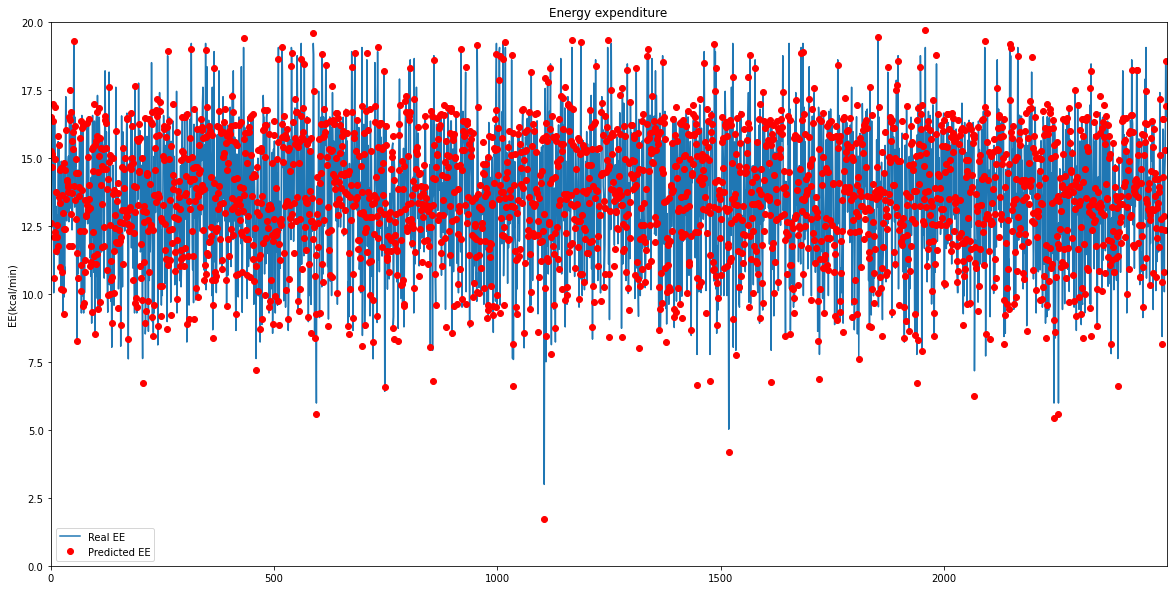

In [ ]:
from google.colab import files

# Plot tested vs predicted Energy Expenditure
x = [x for x in range(len(Y_test1))]

# Guard variables for later comparision with Weir equation
EE_pred = pd.read_csv('Combined1.csv',sep=',',engine='python',header=0)

test = plt.figure()
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(x,Y_test1,label = 'Real EE')
plt.plot(x,Y_pred1,'ro',label = 'Predicted EE')
#plt.plot(x,EE_pred,'go',label = 'Predicted EE')
plt.axis([0, len(x), 0, 20])
plt.legend()
plt.ylabel('EE(kcal/min)')
plt.title('Energy expenditure')
test.show()
test.savefig('real_vs_pred_comb.png')
files.download('real_vs_pred_comb.png')